In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(total_features,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
optimizer = RMSprop(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

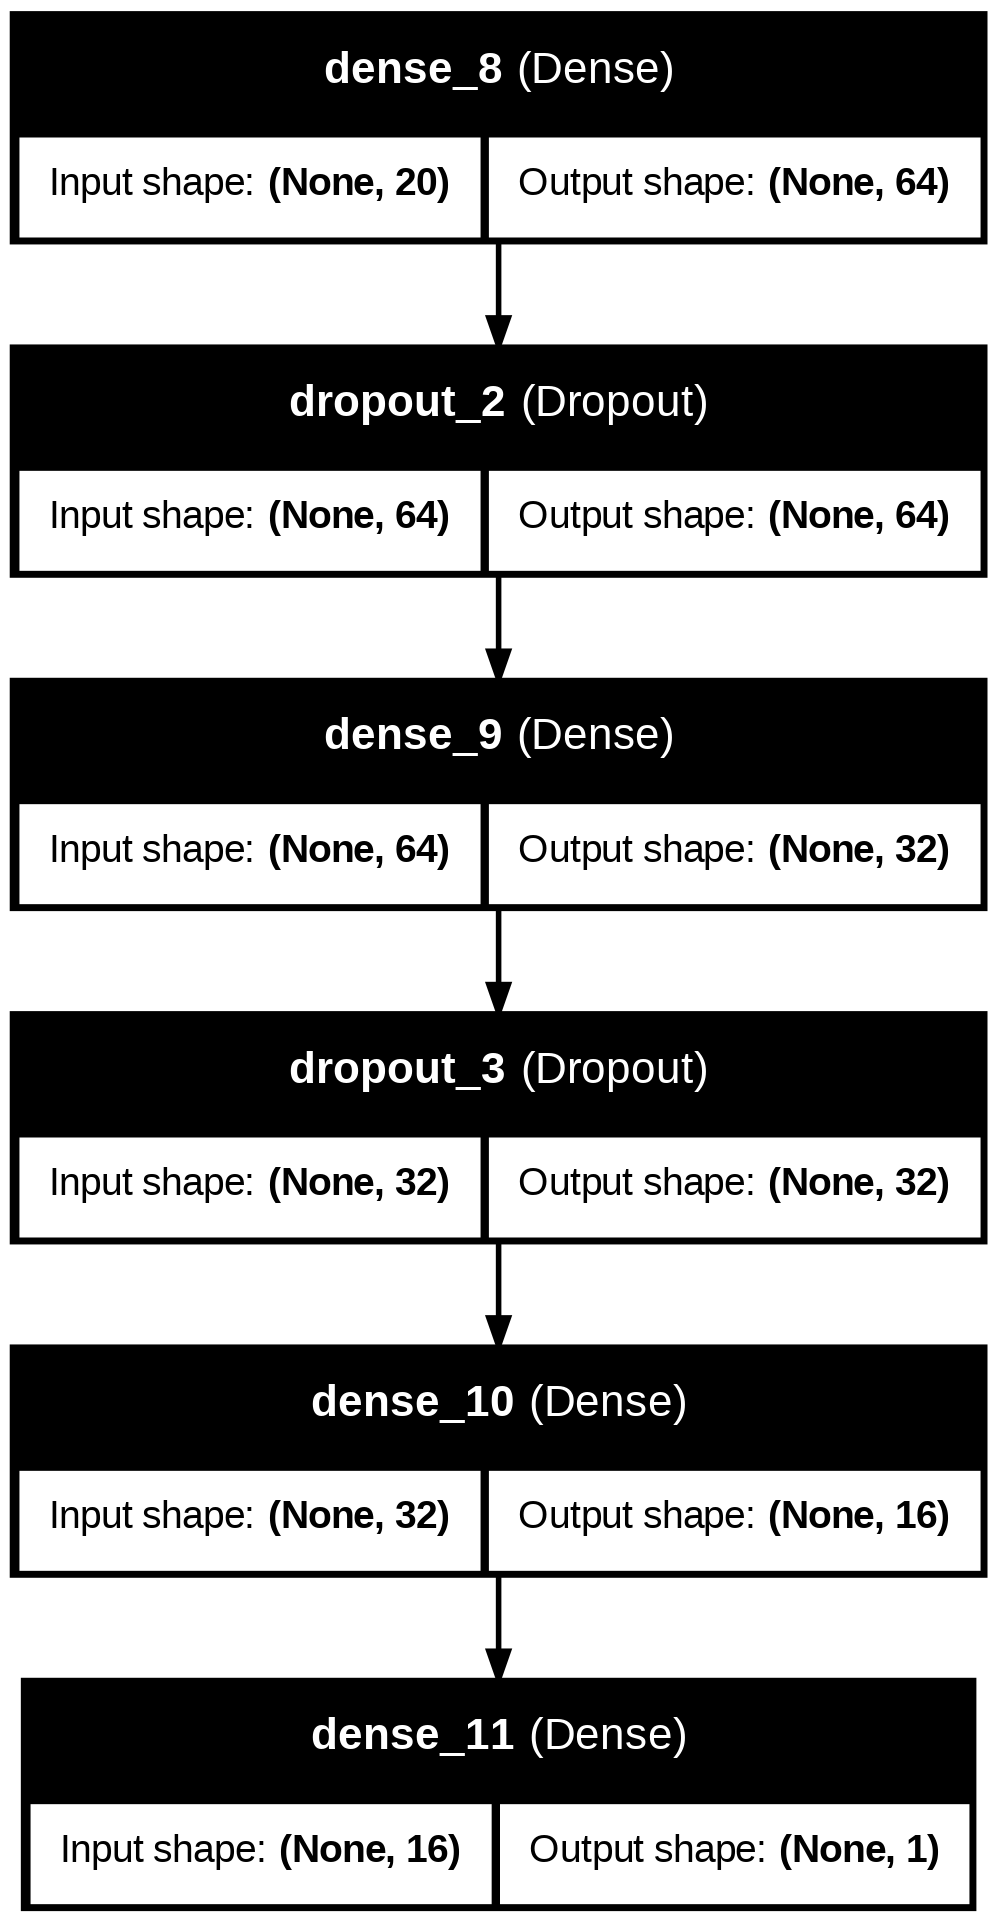

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
import pandas as pd
file_path = '/content/Housing.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [ ]:
num_cat_features = preprocessor.named_transformers_['cat'].transform(X[categorical_features]).shape[1]
total_features = len(numeric_features) + num_cat_features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,  batch_size=8,verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2289168285696.0000 - mean_absolute_error: 1141652.8750 - val_loss: 1663962054656.0000 - val_mean_absolute_error: 907998.7500
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1517242286080.0000 - mean_absolute_error: 934797.3125 - val_loss: 4713219620864.0000 - val_mean_absolute_error: 1839356.8750
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1232358998016.0000 - mean_absolute_error: 838961.6875 - val_loss: 3850298720256.0000 - val_mean_absolute_error: 1628895.5000
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1560250155008.0000 - mean_absolute_error: 976024.2500 - val_loss: 1290896801792.0000 - val_mean_absolute_error: 849400.6250
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1608520171520.0000 - mean_absolute_error: 959671.6250 - val_loss: 1385128919040.0000 - val_mean_absolute_error: 848260.1875
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1641825173504.0000 - me

In [ ]:
print(model.evaluate(X_test,y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2090788978688.0000 - mean_absolute_error: 993163.4375  
[2238504763392.0, 1046798.625]


In [ ]:
y_pred=model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[ 3707942. ],
       [ 7188742. ],
       [ 3180344.5],
       [ 4369268.5],
       [ 3513069.2],
       [ 2977232.8],
       [ 5190846. ],
       [ 5444915. ],
       [ 2781085.2],
       [ 2855624.2],
       [11604631. ],
       [ 2501934. ],
       [ 2676594.8],
       [ 2907990.8],
       [ 3250041.8],
       [ 4475410.5],
       [ 3137644. ],
       [ 3689806.2],
       [ 3796790.2],
       [ 3587754. ],
       [ 5801649. ],
       [ 5729845.5],
       [ 2468719.8],
       [ 4705960. ],
       [ 4358741. ],
       [ 6246958.5],
       [ 3252764.8],
       [ 4023495.2],
       [ 9773150. ],
       [ 3270010.8],
       [ 6483448. ],
       [ 2780942.5],
       [ 6164236. ],
       [ 3875825.5],
       [ 2831620.5],
       [ 5498831. ],
       [ 4189320.5],
       [ 3995753.5],
       [ 2786851. ],
       [ 3874349.2],
       [ 3823262.5],
       [ 3138937.8],
       [ 7164625.5],
       [ 3581363.2],
       [ 3751724.8],
       [ 3556217.2],
       [ 7106763.5],
       [ 3580

In [ ]:
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Flatten y_pred to be 1-dimensional
y_pred = y_pred.flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 1046798.62
Mean Squared Error (MSE): 2238504763392.00
Root Mean Squared Error (RMSE): 1496163.35
R-Squared (R²): 0.56
Mean Absolute Percentage Error (MAPE): 20.84%


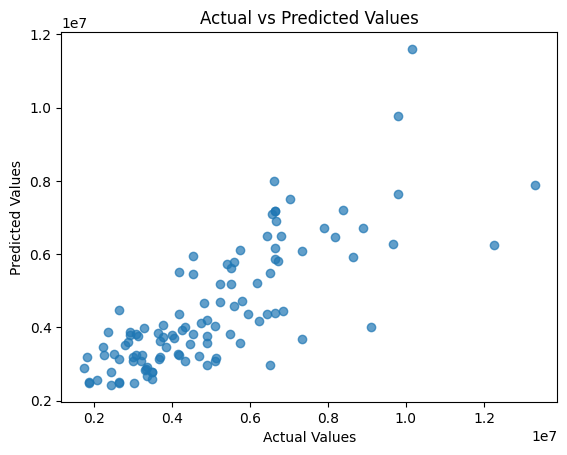

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


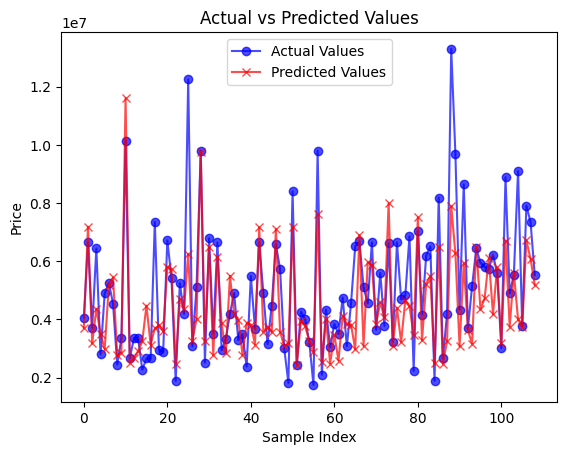

In [ ]:
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', marker='o', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


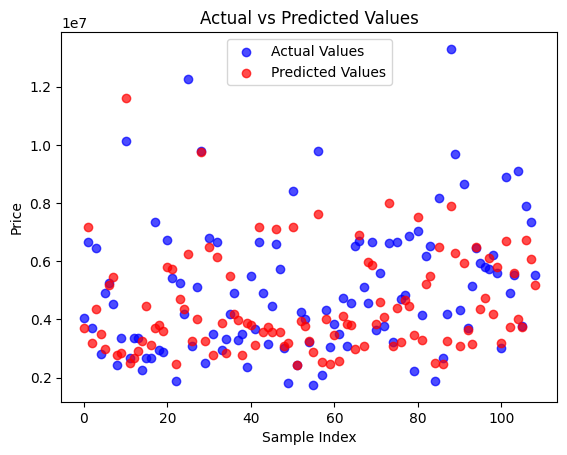

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.7)

# Scatter plot for predicted values
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.7)

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
